In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn.metrics

In [39]:
data = pd.read_excel("C:/Users/Donát/Documents/GitHub/-nkutfel/2019/2019_merged_matekA1A2_cleaned.xlsx")

In [40]:
data.columns

Index(['Name', 'Neptun', 'Mat_term_tag', 'Emelt', 'Tankör', 'Szak',
       'Matek 1-4 helyes', 'Matek 5-10 helyes', 'Matek 11-14 helyes',
       'Matek helyes', 'Matek eredmény', 'Kognitív pont', 'Kognitív eredmény',
       'Össz eredmény (átlag)', 'ZH0', 'Tanulmányi pont', 'Érettségi pont',
       'Többletpont', 'Összes pont', 'Matematika A1a - Analízis',
       'Matematika A2c'],
      dtype='object')

In [41]:
#szűrjük ki a nem kategorikus vagy numerikus változókat
working_data = data.drop(labels = ["Name", "Neptun", "Tankör"], axis = 1)

#alakítsuk numerikussá a %-os teljesítménymutatókat
for i, row in working_data.iterrows():
    working_data.at[i, "Matek eredmény"] = float(row["Matek eredmény"][:-3] + "." + row["Matek eredmény"][-2])
    working_data.at[i, "Kognitív eredmény"] = float(row["Kognitív eredmény"][:-3] + "." + row["Kognitív eredmény"][-2])
    working_data.at[i, "Kognitív pont"] = float(str(row["Kognitív pont"]).replace(",", "."))
    working_data.at[i, "Össz eredmény (átlag)"] = float(row["Össz eredmény (átlag)"][:-3] + "." + row["Össz eredmény (átlag)"][-2])



In [43]:
#Az összes adatra
#working_data = working_data.query("Szak in ['Vegyészmérnöki', 'Biomérnöki']")
features = working_data.drop(labels = ["Matematika A1a - Analízis", "Matematika A2c", "Szak"], axis = 1)
label = working_data["Matematika A1a - Analízis"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

clf = tree.DecisionTreeClassifier(random_state=0)
modell = clf.fit(X_train, y_train)

y_pred = modell.predict(X_test)
y_tanito = modell.predict(X_train)

#értékeljük ki a kezdetleges modellt
print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')

Accuracy: 0.33
Precision: 0.25
Recall: 0.27


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

Optimal depth of tree: 2


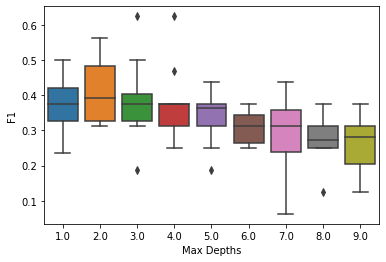

In [37]:
#nézzük meg az optimális mélységet
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt


data_of_depths = pd.DataFrame({"Max Depths":[], "F1": []})
tree_dict = {}
for i in range(1,10):
    clf = tree.DecisionTreeClassifier(max_depth = i, random_state=0)
    scores_tree = cross_val_score(clf, X_train, y_train, scoring = "accuracy", cv=10)
    for element in scores_tree:
        data_of_depths = data_of_depths.append({"Max Depths":i, "F1": element}, ignore_index=True)
    tree_dict[scores_tree.mean()] = i
print("Optimal depth of tree:",tree_dict[max(list(tree_dict.keys()))])
sns.boxplot(x="Max Depths", y="F1", data=data_of_depths)
plt.show()


In [26]:
#Nézzük a fát szakokra (a python-os sklearn tree-je nem tud kezelni kategorikus változókat, amik nem ordinálisak)

#VEGYÉSZ
#tanító és teszthalmaz
vegyesz = working_data.query("Szak == 'Vegyészmérnöki'")
features = vegyesz.drop(labels = ["Matematika A1a - Analízis", "Matematika A2c", "Szak"], axis = 1)
label = vegyesz["Matematika A1a - Analízis"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

clf_veg = tree.DecisionTreeClassifier(random_state=0)
modell_veg = clf_veg.fit(X_train, y_train)

y_pred = modell_veg.predict(X_test)
y_tanito = modell_veg.predict(X_train)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')



Accuracy: 0.39


In [27]:
#BIO
#tanító és teszthalmaz
bio = working_data.query("Szak == 'Biomérnöki'")
features = bio.drop(labels = ["Matematika A1a - Analízis", "Matematika A2c", "Szak"], axis = 1)
label = bio["Matematika A1a - Analízis"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)
s
clf_bio = tree.DecisionTreeClassifier(random_state=0)
modell_bio = clf_bio.fit(X_train, y_train)

y_pred = modell_bio.predict(X_test)
y_tanito = modell_bio.predict(X_train)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')

Accuracy: 0.24
